#  Analisis dan Prediksi Produksi Padi

## Import pustaka

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Membaca Dataset

In [29]:
# Membaca file Excel
data = pd.read_excel("produksiPadi.xlsx")

# Menampilkan beberapa baris pertama dataset
print("Tampilan Data Awal:")
print(data.head())

# Informasi tentang dataset
print("\nInformasi Dataset:")
print(data.info())

# Statistik deskriptif
print("\nStatistik Deskriptif Dataset:")
print(data.describe())

# Ganti nama kolom agar lebih sederhana
data.rename(columns={"Tahun": "Tahun", "Produksi Padi(Ton)": "Produksi Padi"}, inplace=True)

Tampilan Data Awal:
   Tahun  Produksi Padi(Ton)
0   1970          18693649.0
1   1971          20483687.0
2   1972          19393933.0
3   1973          21490578.0
4   1974          22476073.0

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tahun               53 non-null     int64  
 1   Produksi Padi(Ton)  53 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 980.0 bytes
None

Statistik Deskriptif Dataset:
             Tahun  Produksi Padi(Ton)
count    53.000000        5.300000e+01
mean   1996.000000        4.694139e+07
std      15.443445        1.632983e+07
min    1970.000000        1.869365e+07
25%    1983.000000        3.530311e+07
50%    1996.000000        4.937705e+07
75%    2009.000000        5.460403e+07
max    2022.000000        8.114862e+07


## Eksplorasi Data Analysis (EDA)


Cek Nilai Kosong:
Tahun            0
Produksi Padi    0
dtype: int64


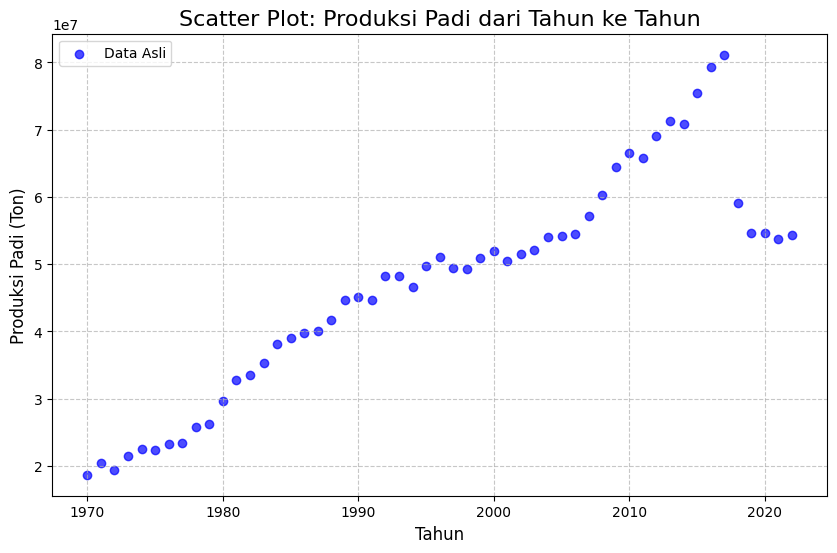

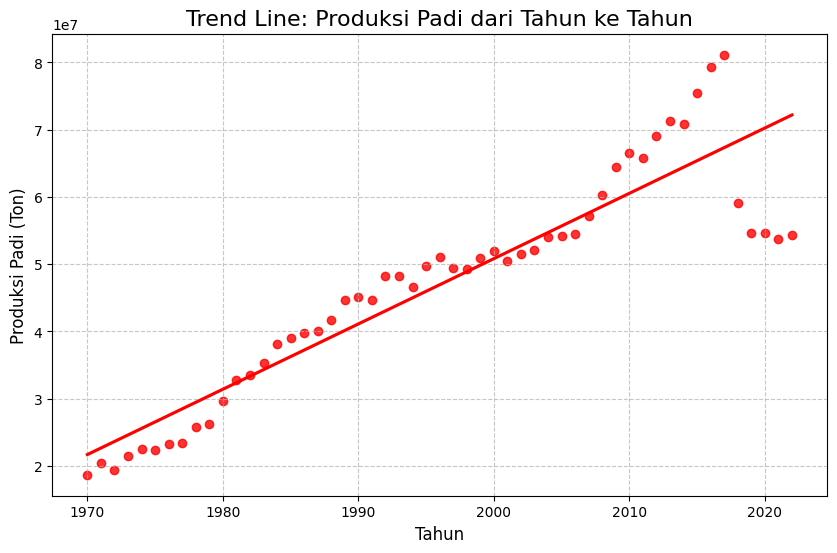

In [30]:
# Mengecek nilai yang hilang
print("\nCek Nilai Kosong:")
print(data.isnull().sum())

# Visualisasi scatter plot produksi padi dari tahun ke tahun
plt.figure(figsize=(10, 6))
plt.scatter(data['Tahun'], data['Produksi Padi'], color='blue', alpha=0.7, label='Data Asli')
plt.title("Scatter Plot: Produksi Padi dari Tahun ke Tahun", fontsize=16)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Produksi Padi (Ton)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Visualisasi dengan trendline menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x="Tahun", y="Produksi Padi", data=data, ci=None, color='red')
plt.title("Trend Line: Produksi Padi dari Tahun ke Tahun", fontsize=16)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Produksi Padi (Ton)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Analisis Korelasi


Matriks Korelasi:
                  Tahun  Produksi Padi
Tahun          1.000000       0.918377
Produksi Padi  0.918377       1.000000


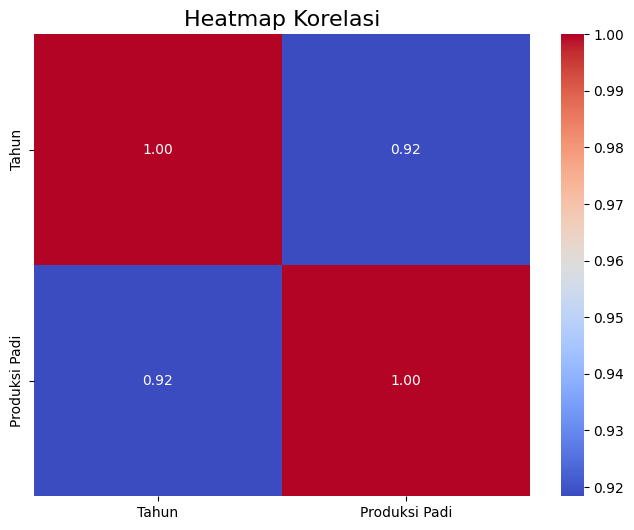

In [31]:
# Matriks korelasi
correlation = data.corr()
print("\nMatriks Korelasi:")
print(correlation)

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi", fontsize=16)
plt.show()

## Menyiapkan Data untuk Regresi

In [32]:
# Memisahkan fitur (X) dan target (y)
X = data[['Tahun']]  # Fitur
y = data['Produksi Padi']  # Target

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Melatih Model Regresi Linear

In [38]:
# Melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Membuat model regresi linear
model = LinearRegression()

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Menampilkan koefisien dan intercept model
print("\nKoefisien Model:")
print(f"Koefisien (Kemiringan): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Koefisien Model:
Koefisien (Kemiringan): 949850.8091217815
Intercept: -1849181993.9398491


## Evaluasi Model

In [34]:
# Melakukan prediksi dengan data uji
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error (MSE) dan R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Evaluasi Model:
Mean Squared Error (MSE): 52964617030888.55
R-squared (R²): 0.847194482876485


## Model Coefficients

In [17]:
print("\nModel Coefficients:")
print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Model Coefficients:
Coefficient (Slope): 949850.8091217815
Intercept: -1849181993.9398491


## Visualisasi Hasil

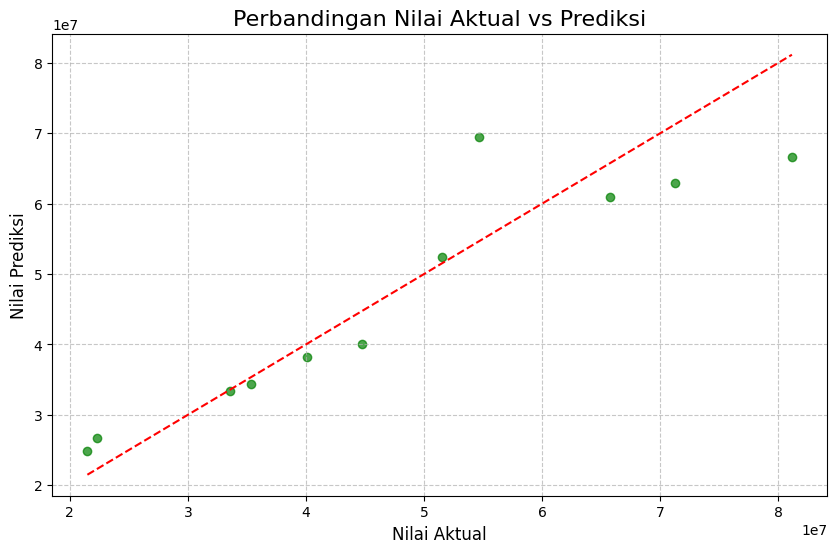

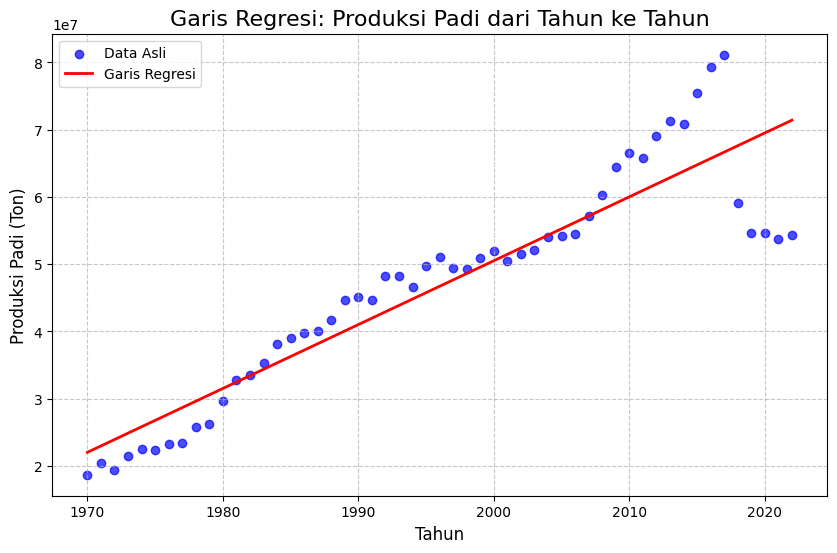

In [35]:
# Membandingkan nilai aktual dengan prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Perbandingan Nilai Aktual vs Prediksi", fontsize=16)
plt.xlabel("Nilai Aktual", fontsize=12)
plt.ylabel("Nilai Prediksi", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualisasi garis regresi
plt.figure(figsize=(10, 6))
plt.scatter(data['Tahun'], data['Produksi Padi'], color='blue', label='Data Asli', alpha=0.7)
plt.plot(data['Tahun'], model.predict(data[['Tahun']]), color='red', label='Garis Regresi', linewidth=2)
plt.title("Garis Regresi: Produksi Padi dari Tahun ke Tahun", fontsize=16)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Produksi Padi (Ton)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


## Prediksi Masa Depan (Opsional)

In [36]:
# Prediksi produksi padi untuk tahun mendatang
tahun_masa_depan = pd.DataFrame({'Tahun': [2025, 2030, 2035]})
prediksi_masa_depan = model.predict(tahun_masa_depan)

print("\nPrediksi Masa Depan:")
for tahun, prediksi in zip(tahun_masa_depan['Tahun'], prediksi_masa_depan):
    print(f"Tahun {tahun}: Prediksi Produksi Padi = {prediksi:.2f} Ton")


Prediksi Masa Depan:
Tahun 2025: Prediksi Produksi Padi = 74265894.53 Ton
Tahun 2030: Prediksi Produksi Padi = 79015148.58 Ton
Tahun 2035: Prediksi Produksi Padi = 83764402.62 Ton
